In [1]:
import sys
import pathlib

sys.path.append("../")

from statespace import *

In [2]:
pathlib.Path().resolve().parent

WindowsPath('C:/Users/NielsOta/Code/StateSpace')

In [3]:
base_dir = pathlib.Path().resolve().parent
data_dir = base_dir / 'data'
nile_path = data_dir / 'Nile.txt'

# Option 1

In [4]:
llm = LocalLevelModel(nile_path)
llm.fit()
llm.att

Parameters: {'var_eta': 1412.2860719525622, 'var_eps': 15301.476713910395}


array([1120.        , 1137.99614532, 1076.47168422, 1117.52076335,
       1129.65152965, 1137.97430566, 1050.80850961, 1098.29200948,
       1169.81505567, 1161.99508979, 1118.28183772, 1070.35714309,
       1080.71687543, 1058.06275183, 1048.12089677, 1025.10624313,
       1065.55793393,  995.9462806 ,  986.03675731, 1026.24331516,
       1045.50433198, 1088.46105898, 1104.53143853, 1142.51930745,
       1173.19837143, 1185.42020807, 1144.83358282, 1133.12568638,
       1039.34317049,  987.286455  ,  957.70269411,  888.83905632,
        902.19928647,  884.1285019 ,  836.30610559,  857.11746461,
        813.99849218,  867.7939726 ,  915.37547277,  929.37904602,
        903.68822415,  857.28650853,  752.4940692 ,  771.16721359,
        753.10480461,  848.91625525,  914.48456499,  892.94444693,
        859.27173966,  849.27741174,  828.05253112,  832.47821344,
        840.70985052,  846.26958565,  807.55028852,  817.32995102,
        798.1804798 ,  797.6110667 ,  860.90880297,  834.29621

Text(0.5, 1.0, 'Filtered State: Nile Data')

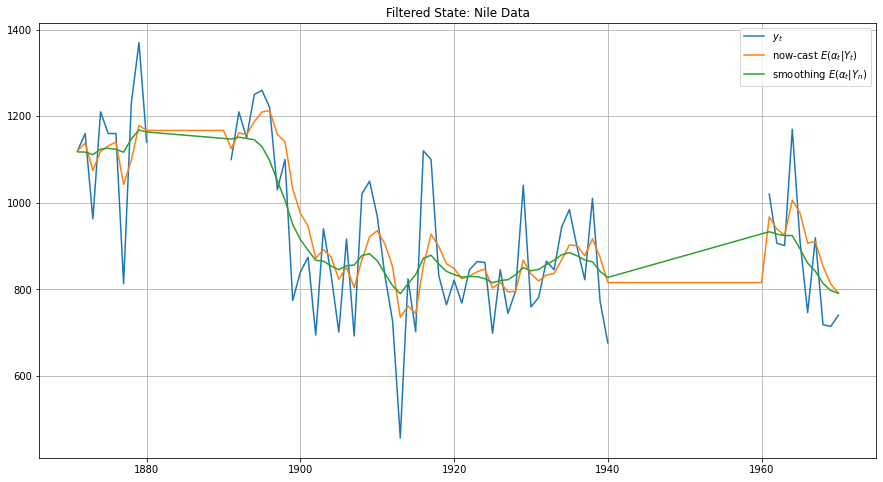

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

time = range(1871, 1871 + len(llm.a_hat))

ax.plot(time, llm.y, label=r'$y_t$')
ax.plot(time, llm.att, label=r'now-cast $E(\alpha_t|Y_t)$')
ax.plot(time, llm.a_hat, label=r'smoothing $E(\alpha_t|Y_n)$')
ax.grid()
ax.legend()
ax.set_title('Filtered State: Nile Data')

In [6]:
llm.residual_diagnostics()

{'F_stat': 0.6069038807359911, 'p_val': 0.9216578989976075}
{'N_stat': 0.2591567122284033, 'p_val': 0.7075482710444179}
{'Q_stat': 13.443838107913292, 'p_val': 0.19990366077626592}


[{'F_stat': 0.6069038807359911, 'p_val': 0.9216578989976075},
 {'N_stat': 0.2591567122284033, 'p_val': 0.7075482710444179},
 {'Q_stat': 13.443838107913292, 'p_val': 0.19990366077626592}]

# Option 2

Parameters: {'var_eta': 2014.4424691777388, 'var_eps': 16333.379508139558}


Text(0.5, 1.0, 'Filtered State: Nile Data')

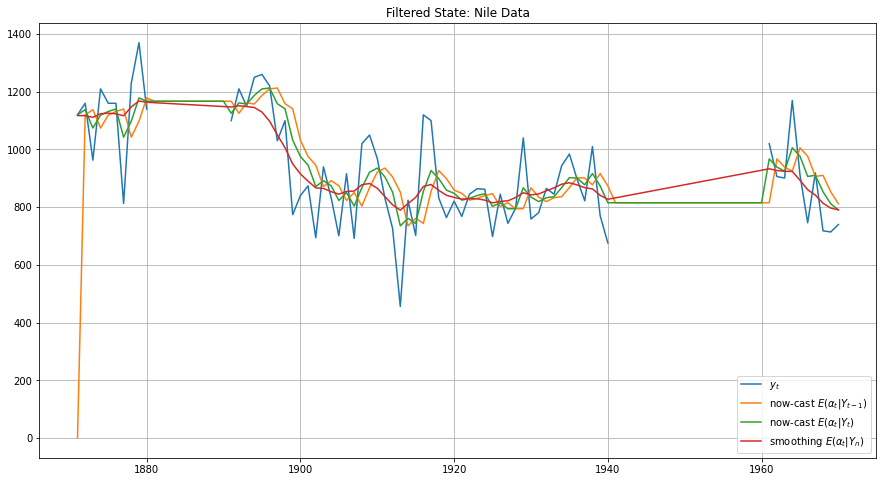

In [14]:
nile_data = pd.read_csv(nile_path).values.astype("float")
nile_data[10:20] = np.nan
nile_data[70:90] = np.nan

llm = LocalLevelModel()
llm.fit(nile_data)
llm.a_hat

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

time = range(1871, 1871 + len(nile_data))

ax.plot(time, llm.y, label=r'$y_t$')
ax.plot(time, llm.a, label=r'now-cast $E(\alpha_t|Y_{t-1})$')
ax.plot(time, llm.att, label=r'now-cast $E(\alpha_t|Y_t)$')
ax.plot(time, llm.a_hat, label=r'smoothing $E(\alpha_t|Y_n)$')
ax.grid()
ax.legend()
ax.set_title('Filtered State: Nile Data')